# Exploratory Data Analysis (using MedMNIST as an example)

This notebook walks through some best practices while exploring a data set, using the MedMNIST data set as an example. The code here depends on PyTorch and creates a Dataset object, on which all the functionality is demonstrated. This however could be easily replicated on other similar data structures (Datastores in MATLAB, ...)

In [1]:
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import medmnist
from medmnist import INFO

In [2]:
def plot_per_class_histogram(data_set, n_images):
    category_names = list(train_dataset.info['label'].values())
    n_classes = np.unique(data_set.labels)
    data_hist = np.zeros(len(n_classes))
    for elem in data_set.labels:
        data_hist[elem] += 1

    data_hist /= len(data_set.labels)

    fig, ax = plt.subplots()
    plt.bar(n_classes, data_hist)
    plt.axhline(1./len(n_classes))
    plt.title("Normalized histogram of labels in data set")
    ax.set_xticks(range(len(n_classes)))
    ax.set_xticklabels(category_names, rotation = 90)

In [3]:
data_flag = 'pathmnist'
download = True
BATCH_SIZE = 128

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [4]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)

Using downloaded and verified file: /Users/amithkamath/.medmnist/pathmnist.npz


Dataset PathMNIST (pathmnist)
    Number of datapoints: 89996
    Root location: /Users/amithkamath/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
    Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3×224×224 into 3×28×28, and split NCT-CRC-HE-10

/Users/amithkamath/opt/anaconda3/envs/ub-deeplearning/lib/python3.9/site-packages/medmnist/utils.py:25: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


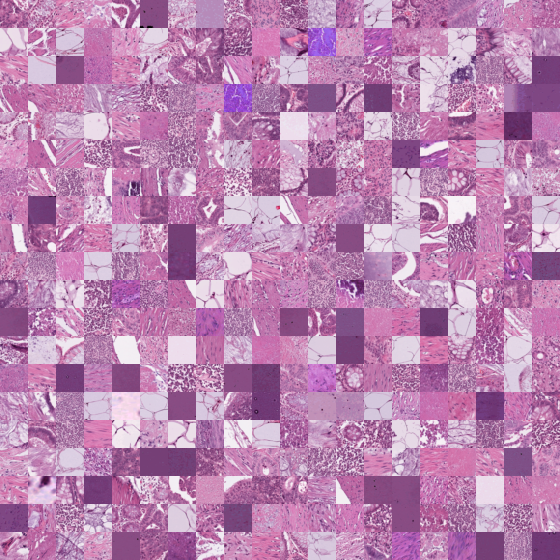

In [5]:
print(train_dataset)

train_dataset.montage(length=20)

In [6]:
type(train_dataset)

medmnist.dataset.PathMNIST

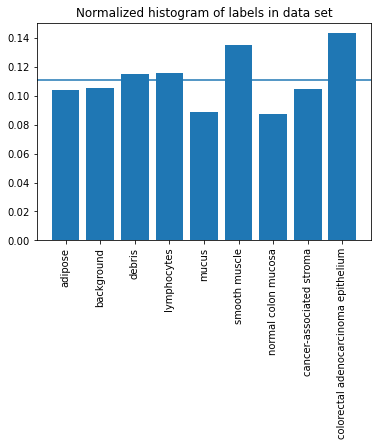

In [7]:
n_images = len(train_dataset)
plot_per_class_histogram(train_dataset, n_images)